In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data for all the different movies
rt_movies_df = pd.read_csv('rotten_tomatoes_movies.csv')

# Data for all the different critic reviews
rt_critic_reviews_df = pd.read_csv('rotten_tomatoes_critic_reviews_50k.csv')


# Combine the two dataframes into one
combined_df = pd.merge(rt_movies_df, rt_critic_reviews_df, on='rotten_tomatoes_link')
# print(combined_df.head(5))
rotten_tomatoes_combined = pd.DataFrame.to_csv(combined_df)




In [3]:
'''
---- Movie Info ----
Rotten_Tomatoes_Link: unique id of the move
Movie_Title: name of the movie
Movie_Info: description of the movie
critics_consensus: constant description of the movie by critics
content_rating: rating (PG, PG-13, R, etc)
Genres: genres of the movie
Directors: directors of the movie
Authors: authors of the movie
Actors: actors of the movie
Original_Release_Date: original release date
Streaming_Release_Date: streaming release date
Runtime: runtime of the movie
Production_Company: production company of the movie
Tomatometer_Status: The rating of what the movie got (fresh, rotten, etc)
Tomatometer_Rating: The rating of the movie
Tomatometer_Count: number of professional critic reviews that are positive
Audience_Status: The rating of what the movie got according to audience(fresh, rotten, etc)
Audience_Rating: The rating of the movie according to audience
Audience_Count: number of audience reviews that are positive
Tomatometer_Top_Critics_Count: number of established critics that have reviewed the movie
Tomatometer_Fresh_Critics_Count: number of positive reviews by critics
Tomatometer_Rotten_Critics_Count: number of negative reviews by critics
------Individual Critic Info----
Critic_Name: Critic reviewing the movie
Top_Critic: True if person is an established critic
Publisher_Name: publisher of the critic
Review_Type: Review that the critic gave
Review_Score: critic's score
Review_Date: critic's review date
Review_Content: Description by the critic
'''

"\n---- Movie Info ----\nRotten_Tomatoes_Link: unique id of the move\nMovie_Title: name of the movie\nMovie_Info: description of the movie\ncritics_consensus: constant description of the movie by critics\ncontent_rating: rating (PG, PG-13, R, etc)\nGenres: genres of the movie\nDirectors: directors of the movie\nAuthors: authors of the movie\nActors: actors of the movie\nOriginal_Release_Date: original release date\nStreaming_Release_Date: streaming release date\nRuntime: runtime of the movie\nProduction_Company: production company of the movie\nTomatometer_Status: The rating of what the movie got (fresh, rotten, etc)\nTomatometer_Rating: The rating of the movie\nTomatometer_Count: number of professional critic reviews that are positive\nAudience_Status: The rating of what the movie got according to audience(fresh, rotten, etc)\nAudience_Rating: The rating of the movie according to audience\nAudience_Count: number of audience reviews that are positive\nTomatometer_Top_Critics_Count: num

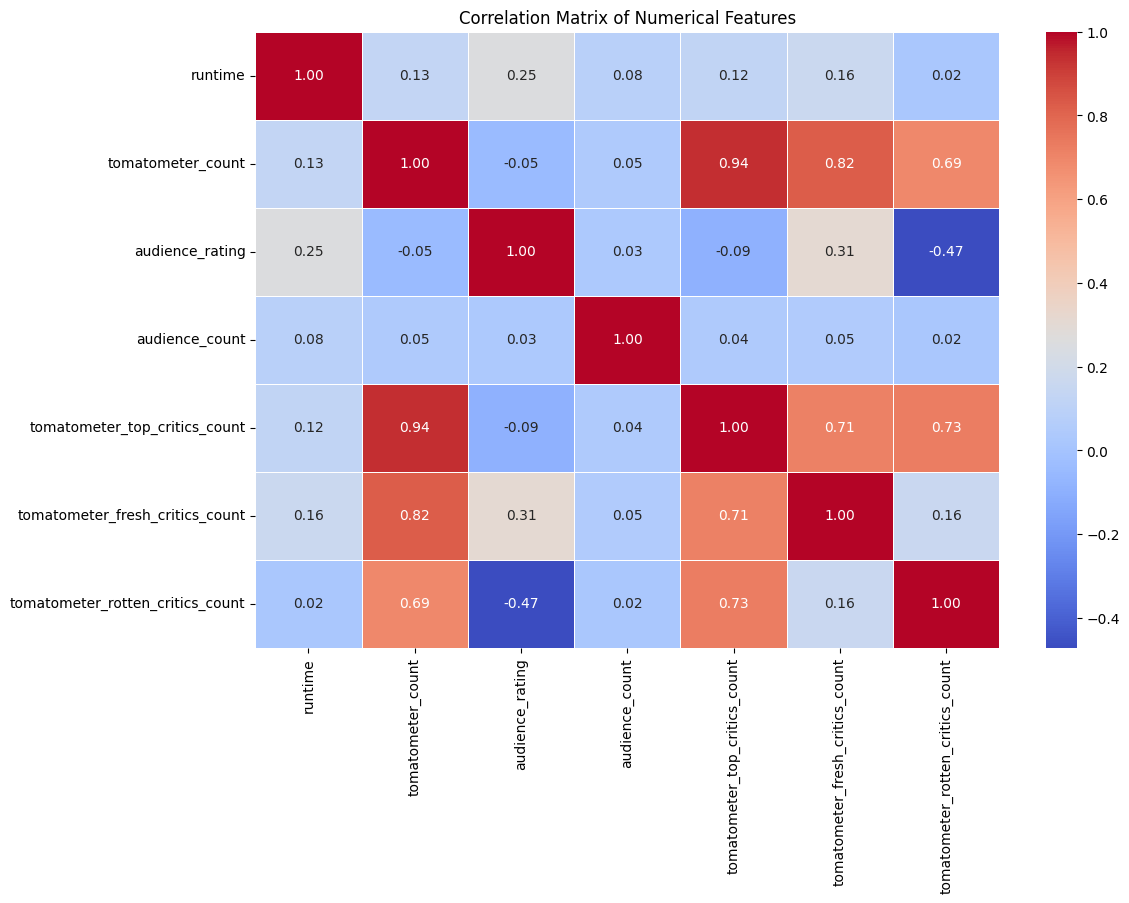

In [4]:
numerical_features = [
    'runtime', 'tomatometer_count',
    'audience_rating', 'audience_count', 'tomatometer_top_critics_count',
    'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'
]

correlation_matrix = combined_df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [5]:
combined_df.head(5)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [7]:
df_genres = combined_df['genres'].str.get_dummies(',')
all_genres = df_genres.columns.to_list()
all_genres = [genre.strip() for genre in all_genres]
all_genres = list(set(all_genres))
all_genres.sort()
print(all_genres)

['Action & Adventure', 'Animation', 'Art House & International', 'Classics', 'Comedy', 'Cult Movies', 'Documentary', 'Drama', 'Faith & Spirituality', 'Horror', 'Kids & Family', 'Musical & Performing Arts', 'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy', 'Special Interest', 'Sports & Fitness', 'Television', 'Western']


In [8]:
df_test = pd.read_csv('rotten_tomatoes_combined.csv')

df_test['original_release_date'] = pd.to_datetime(df_test['original_release_date'])
df_test['streaming_release_date'] = pd.to_datetime(df_test['streaming_release_date'])

df_test['release_year'] = df_test['original_release_date'].dt.year

genres = df_test['genres'].str.get_dummies(sep=', ')
print(genres.columns)

content_rating_dummies = pd.get_dummies(df_test['content_rating'], prefix='rating')

numerical_features = df_test[['audience_rating', 'audience_count', 'runtime', 'release_year']]
features = pd.concat([numerical_features, genres, content_rating_dummies], axis=1)

features = features.fillna(features.mean())

le = LabelEncoder()

target = le.fit_transform(df_test['tomatometer_status'])

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.3, 
                                                    random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)




print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

print(features.columns)


Index(['Action & Adventure', 'Animation', 'Art House & International',
       'Classics', 'Comedy', 'Cult Movies', 'Documentary', 'Drama',
       'Faith & Spirituality', 'Horror', 'Kids & Family',
       'Musical & Performing Arts', 'Mystery & Suspense', 'Romance',
       'Science Fiction & Fantasy', 'Special Interest', 'Sports & Fitness',
       'Television', 'Western'],
      dtype='object')
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4117
           1       1.00      1.00      1.00      4384
           2       1.00      1.00      1.00      6490
           3       1.00      1.00      1.00         9

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

Accuracy Score:  0.9996666666666667
Index(['audience_rating', 'audience_count', 'runtime', 'release_year',
       'Action & Adventure', 'Animatio

[[4117    0    0    0]
 [   0 4384    0    0]
 [   0    5 6485    0]
 [   0    0    0    9]]


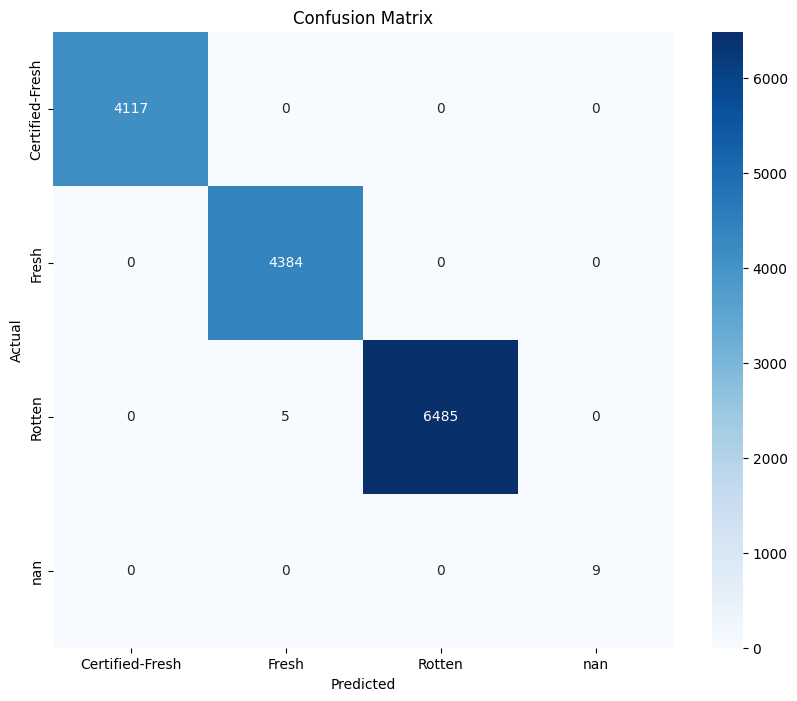

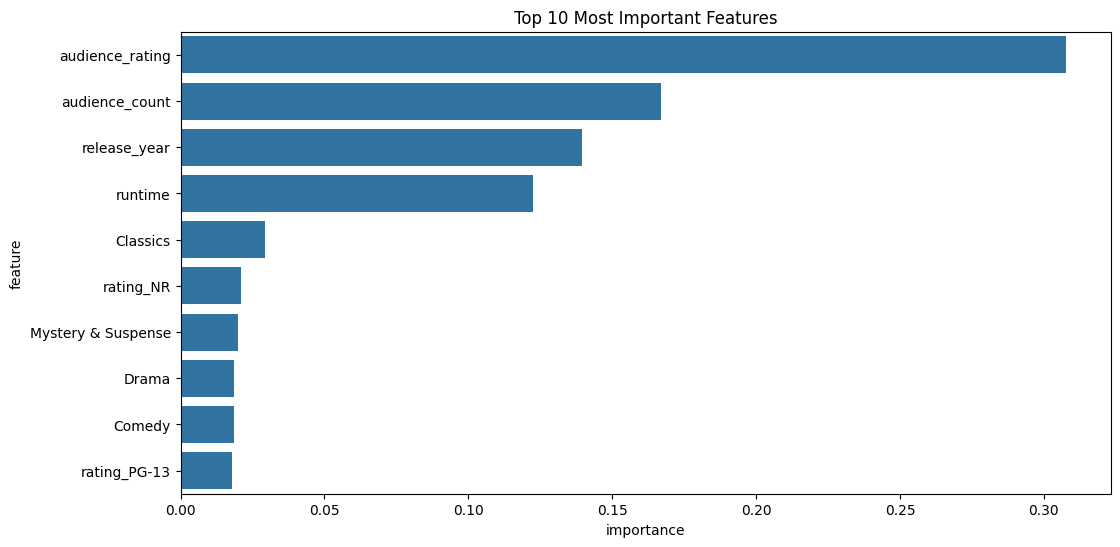

In [9]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


feature_importance = pd.DataFrame({
    'feature': features.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.show()

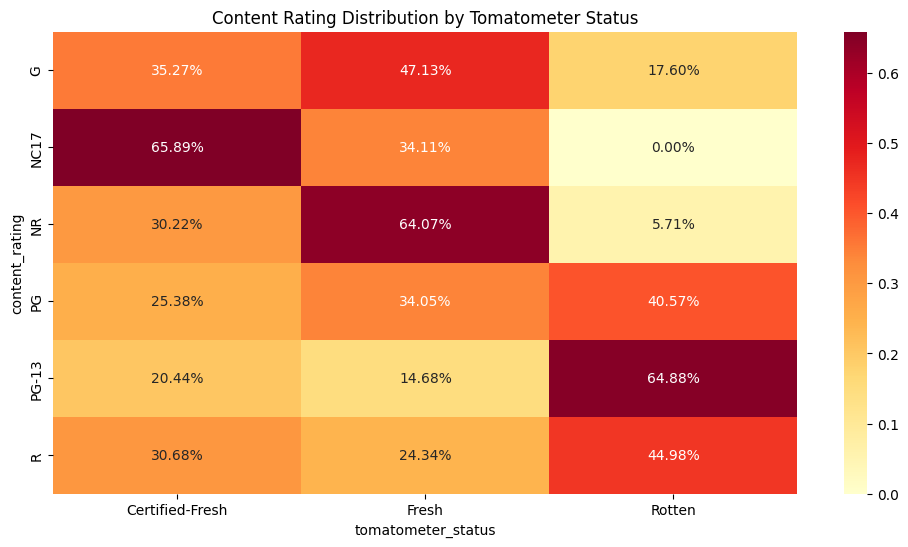

In [14]:
plt.figure(figsize=(12, 6))
content_rating_status = pd.crosstab(df_test['content_rating'], df_test['tomatometer_status'])
content_rating_status_pct = content_rating_status.div(content_rating_status.sum(axis=1), axis=0)
sns.heatmap(content_rating_status_pct, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('Content Rating Distribution by Tomatometer Status')
plt.show()

In [ ]:
def plot_feature_importance_with_ci(model, feature_names, n_iterations=100):
    importances = []
    for i in range(n_iterations):
        # print(i)
        # Bootstrapping
        indices = np.random.randint(0, len(X_train), len(X_train))
        bootstrap_model = RandomForestClassifier(n_estimators=100, random_state=i)
        bootstrap_model.fit(X_train.iloc[indices], y_train[indices])
        importances.append(bootstrap_model.feature_importances_)
    
    # Gets important features and summary stats
    importances = np.array(importances)
    

    mean_imp = np.mean(importances, axis=0)
    std_imp = np.std(importances, axis=0)
    
    # Sort
    indices = np.argsort(mean_imp)[::-1]
    
    plt.figure(figsize=(12, 6))
    plt.title('Feature Importances with 95% Confidence Intervals')
    plt.bar(range(len(mean_imp)), mean_imp[indices],
            yerr=1.96*std_imp[indices],
            align='center')
    plt.xticks(range(len(mean_imp)), 
               [feature_names[i] for i in indices], 
               rotation=45, 
               ha='right')
    plt.tight_layout()
    plt.show()


plot_feature_importance_with_ci(rf_model, features.columns, 20)

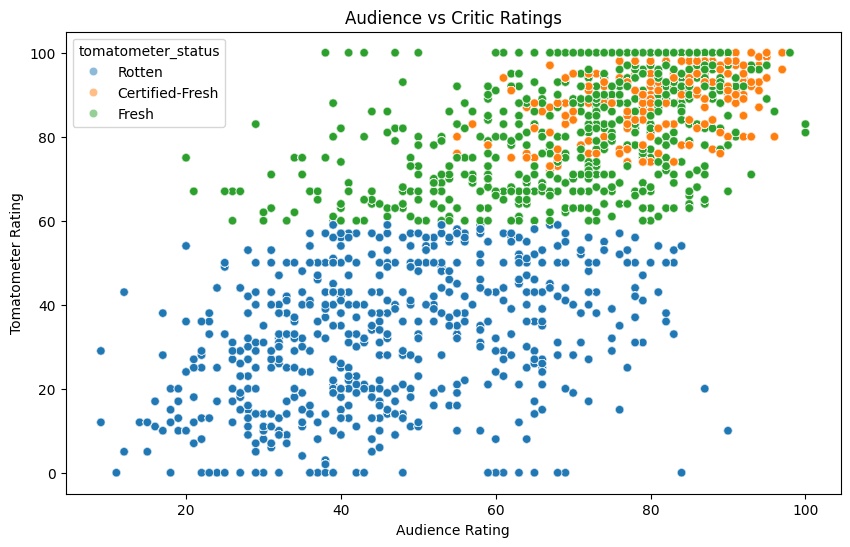

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_test, 
                x='audience_rating', 
                y='tomatometer_rating',
                hue='tomatometer_status',
                alpha=0.5)
plt.title('Audience vs Critic Ratings')
plt.xlabel('Audience Rating')
plt.ylabel('Tomatometer Rating')
plt.show()

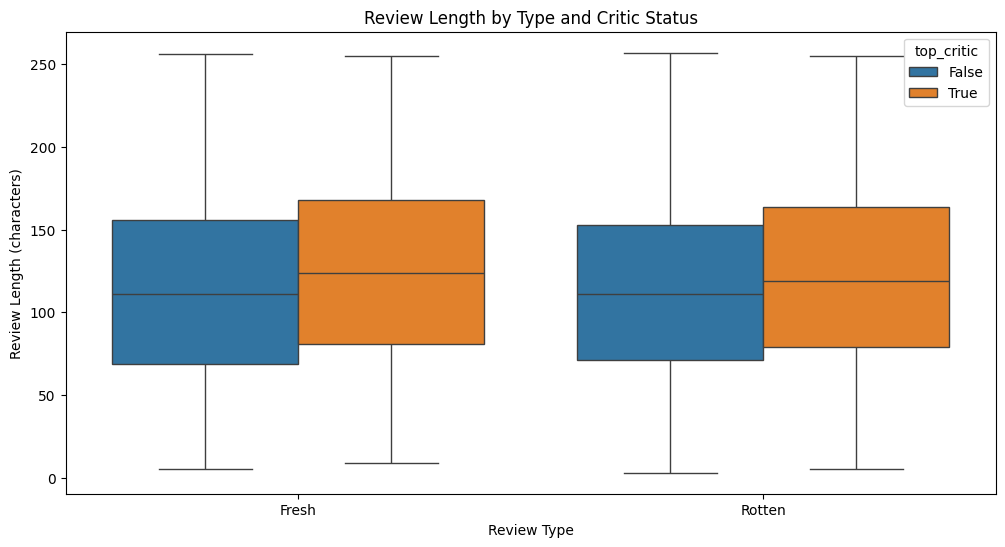

In [18]:
df_test['review_length'] = df_test['review_content'].str.len()
plt.figure(figsize=(12, 6))
sns.boxplot(x='review_type', y='review_length', hue='top_critic', data=df_test)
plt.title('Review Length by Type and Critic Status')
plt.xlabel('Review Type')
plt.ylabel('Review Length (characters)')
plt.show()

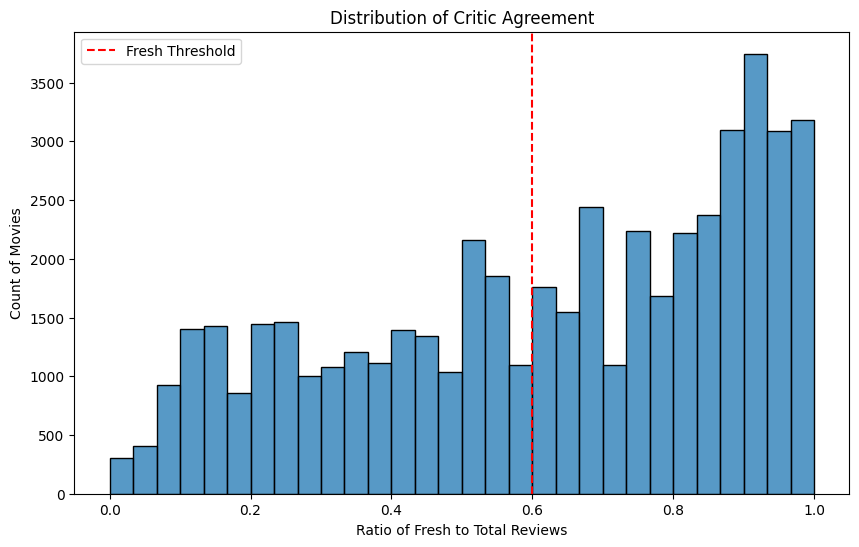

In [17]:
plt.figure(figsize=(10, 6))
agreement_ratio = df_test['tomatometer_fresh_critics_count'] / (df_test['tomatometer_fresh_critics_count'] + df_test['tomatometer_rotten_critics_count'])
sns.histplot(data=agreement_ratio, bins=30)
plt.title('Distribution of Critic Agreement')
plt.xlabel('Ratio of Fresh to Total Reviews')
plt.ylabel('Count of Movies')
plt.axvline(0.6, color='red', linestyle='--', label='Fresh Threshold')
plt.legend()
plt.show()

<Figure size 2000x600 with 0 Axes>

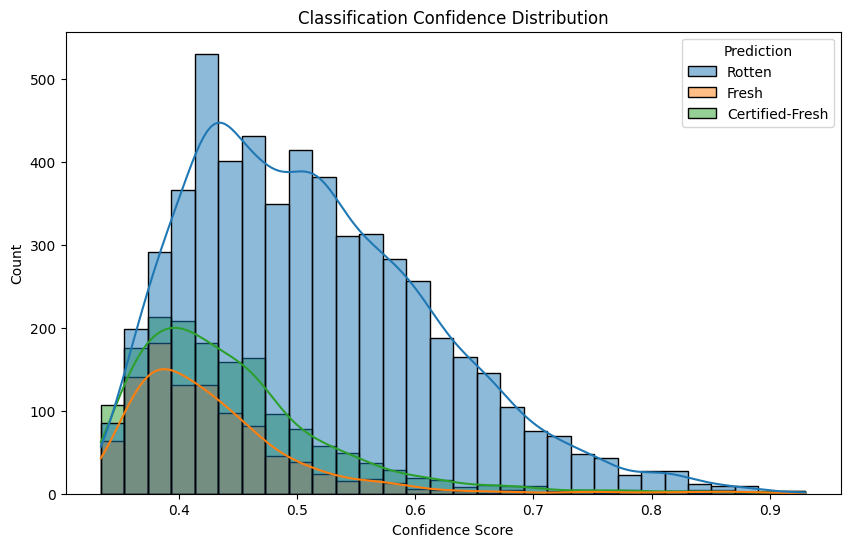

In [ ]:
# NLP
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

reviews_df = df_test.dropna(subset=['review_content', 'tomatometer_status'])


fresh_reviews = reviews_df[reviews_df['tomatometer_status'] == 'Fresh']['review_content']
rotten_reviews = reviews_df[reviews_df['tomatometer_status'] == 'Rotten']['review_content']
certified_reviews = reviews_df[reviews_df['tomatometer_status'] == 'Certified Fresh']['review_content']


plt.figure(figsize=(20, 6))

# words
def plot_wordcloud(text_data, title, position):
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white',
                         stopwords=set(stopwords.words('english')),
                         max_words=100).generate(' '.join(text_data))
    
    plt.subplot(1, 3, position)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)




vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(reviews_df['review_content'])
y = reviews_df['tomatometer_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# too lazy
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


review_probs = clf.predict_proba(X_test)
confidence_scores = np.max(review_probs, axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(data=pd.DataFrame({
    'Confidence': confidence_scores,
    'Prediction': y_pred,
}), x='Confidence', hue='Prediction', bins=30, kde=True)
plt.title('Classification Confidence Distribution')
plt.xlabel('Confidence Score')
plt.ylabel('Count')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b14d6ac1-b584-4e90-810f-f88d3e20a412' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>